In [7]:
import os
import torch
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix


# path = 'stats_logs/rosy-cloud-3539/' # cifar100
path = 'stats_logs/glowing-galaxy-388/' # cifar10

In [8]:
all_clean_labels = torch.load(os.path.join(path, 'all_clean_labels.pt')).detach().cpu()
all_noisy_labels = torch.load(os.path.join(path, 'all_noisy_labels.pt')).detach().cpu()
alpha_matrix = torch.load(os.path.join(path, 'alpha_matrix.pt')).detach().cpu()
_, alpha_label = torch.max(alpha_matrix, 1)
print(f'accuracy of noisy labels = {(all_noisy_labels == all_clean_labels).sum().item()/all_clean_labels.shape[0]}')
print(f'accuracy of new labels = {(alpha_label == all_clean_labels).sum().item()/all_clean_labels.shape[0]}')
# filters
sample_noisy = all_clean_labels != all_noisy_labels
sample_permuted = all_noisy_labels != alpha_label
false_correction = sample_permuted * (alpha_label != all_clean_labels)

filter_ = false_correction

noisy_label_filtered = all_noisy_labels[filter_]
new_label_filtered = alpha_label[filter_]

accuracy of noisy labels = 0.7
accuracy of new labels = 0.89622


<Figure size 432x288 with 0 Axes>

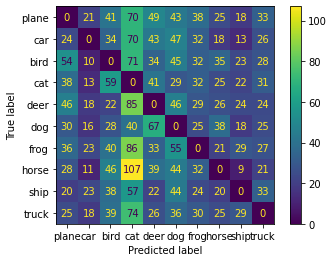

In [9]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
# fig, ax = plt.subplots(figsize=(15, 15))

cm = confusion_matrix(noisy_label_filtered.numpy(), new_label_filtered.numpy())#, labels=['noisy_label', 'new_label'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
plt.savefig('cm.png')
disp.plot()



In [10]:
pd.Series(all_clean_labels).value_counts()

6    5000
9    5000
4    5000
1    5000
2    5000
7    5000
8    5000
3    5000
5    5000
0    5000
dtype: int64

In [11]:
pd.Series(all_noisy_labels).value_counts()

2    5107
3    5088
6    5034
0    5032
7    5022
1    4976
8    4976
9    4962
4    4925
5    4878
dtype: int64

In [46]:
pd.Series(alpha_label).value_counts()

3    5245
9    5087
8    5063
1    4999
6    4990
4    4957
7    4952
0    4948
2    4883
5    4876
dtype: int64

In [6]:
538/466

1.1545064377682404

In [12]:
5107/4878

1.0469454694546945